In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
if os.name == 'posix': 
    plt.rc("font", family="AppleGothic") 

%config InlineBackend.figure_format = 'retina' #레티나 그래프 선명하게 

In [3]:
#국민건강보험 데이터 불러오기 
df = pd.read_csv('건강검진정보_2017.csv',encoding='cp949')
df.shape #(1000000, 34)

(1000000, 34)

# 상관분석 
인과관계는 아니고 연관된 정도가 어느정돈지 알려주는 것 
피어슨/스피어만

In [4]:
df_sample = df.sample(1000, random_state=2) #random_state 고정해준다 랜덤을 

In [5]:
columns = ['연령대코드(5세단위)','체중(5Kg단위)','신장(5Cm단위)','허리둘레','시력(좌)','시력(우)','청력(좌)','청력(우)','수축기혈압','이완기혈압','식전혈당(공복혈당)','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','혈색소','요단백','혈청크레아티닌','(혈청지오티)ALT','(혈청지오티)AST','감마지티피','흡연상태','음주여부']

In [6]:
# 가설2 : 같은 방식으로 데이터를 수치로 변환 후 
# 이후, 데이터의 타입을 변형시켜주는 astype() 메소드 사용
df_sample.loc[df_sample["음주여부"]=="Y","음주여부"] = 1
df_sample.loc[df_sample["음주여부"]=="N","음주여부"] = 0
df_sample["음주여부"] = df_sample["음주여부"].astype("int")
df_sample["음주여부"]

309190    0
240953    1
609687    0
757042    1
788110    0
         ..
871659    1
57408     1
288693    0
653471    0
802015    1
Name: 음주여부, Length: 1000, dtype: int64

In [7]:
df_small = df_sample[columns]
df_corr = df_small.corr() #상관계수
df_corr

,연령대코드(5세단위),체중(5Kg단위),신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)ALT,(혈청지오티)AST,감마지티피,흡연상태,음주여부
연령대코드(5세단위),1.000000,-0.195794,-0.432121,0.184369,-0.158090,-0.095005,0.191617,0.216894,0.267475,0.116245,...,-0.081687,-0.007793,-0.167648,0.024552,0.084918,-0.033317,0.066627,0.019965,-0.168959,-0.299081
체중(5Kg단위),-0.195794,1.000000,0.658750,0.776443,0.055228,0.050270,0.004935,-0.034522,0.228408,0.240429,...,-0.296424,0.070960,0.494789,0.057640,0.171109,0.398397,0.120032,0.196246,0.379881,0.303708
신장(5Cm단위),-0.432121,0.658750,1.000000,0.309763,0.106888,0.128721,-0.052891,-0.074410,0.006052,0.088019,...,-0.139398,-0.026842,0.517162,0.015835,0.159478,0.202121,0.035944,0.151205,0.473398,0.372486
허리둘레,0.184369,0.776443,0.309763,1.000000,0.020080,0.038009,0.069398,0.042127,0.303627,0.250814,...,-0.337414,0.056173,0.369122,0.069613,0.173280,0.367285,0.146289,0.196940,0.244321,0.132944
시력(좌),-0.158090,0.055228,0.106888,0.020080,1.000000,0.232498,-0.075305,-0.055115,-0.004910,0.026669,...,0.000026,0.003373,0.072202,-0.042335,-0.011916,0.031854,-0.013533,-0.022257,0.022893,0.047894
시력(우),-0.095005,0.050270,0.128721,0.038009,0.232498,1.000000,-0.051262,-0.044783,-0.061208,-0.013013,...,0.025332,-0.000710,0.062176,-0.041635,0.018513,0.075224,0.066352,0.229831,0.046114,0.029095
청력(좌),0.191617,0.004935,-0.052891,0.069398,-0.075305,-0.051262,1.000000,0.585095,0.110685,0.062092,...,-0.056549,-0.072430,0.015563,-0.022683,0.009232,-0.013031,0.005166,0.004352,0.016070,-0.053916
청력(우),0.216894,-0.034522,-0.074410,0.042127,-0.055115,-0.044783,0.585095,1.000000,0.069551,0.061305,...,0.006141,-0.073600,0.001330,-0.018548,-0.009680,-0.015326,0.063175,-0.023844,-0.014723,-0.046509
수축기혈압,0.267475,0.228408,0.006052,0.303627,-0.004910,-0.061208,0.110685,0.069551,1.000000,0.754991,...,-0.068813,0.057808,0.199193,0.107850,0.055426,0.158717,0.104714,0.145826,0.120128,0.066523
이완기혈압,0.116245,0.240429,0.088019,0.250814,0.026669,-0.013013,0.062092,0.061305,0.754991,1.000000,...,-0.038663,0.071243,0.264914,0.052314,0.063735,0.141329,0.062538,0.152278,0.157163,0.123395


In [8]:
#대각선은 1 자기자신에 대한 상관계수기 떄문에.
# -1~-0.7이라면 강한 음적 선형관계
# 0.7~1사이라면 강한 양적 선형관계
# -0.1~0.1 거의 무시해도 되는 선형관계


In [9]:
df_corr['신장(5Cm단위)'].sort_values() #정렬
#신장과 가장 강한 상관관계는 체중이다. 
df_corr.loc[df_corr['신장(5Cm단위)']>0.3,'신장(5Cm단위)'] #특정수치 이상인 데이터만 보자. 

체중(5Kg단위)    0.658750
신장(5Cm단위)    1.000000
허리둘레         0.309763
혈색소          0.517162
흡연상태         0.473398
음주여부         0.372486
Name: 신장(5Cm단위), dtype: float64

In [10]:
df_corr.loc[df_corr['음주여부']>0.25,'음주여부']

체중(5Kg단위)    0.303708
신장(5Cm단위)    0.372486
혈색소          0.279196
흡연상태         0.358403
음주여부         1.000000
Name: 음주여부, dtype: float64

In [11]:
df_corr['혈색소'].sort_values(ascending=False).head(7)

혈색소           1.000000
신장(5Cm단위)     0.517162
체중(5Kg단위)     0.494789
흡연상태          0.450964
허리둘레          0.369122
(혈청지오티)ALT    0.293241
음주여부          0.279196
Name: 혈색소, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


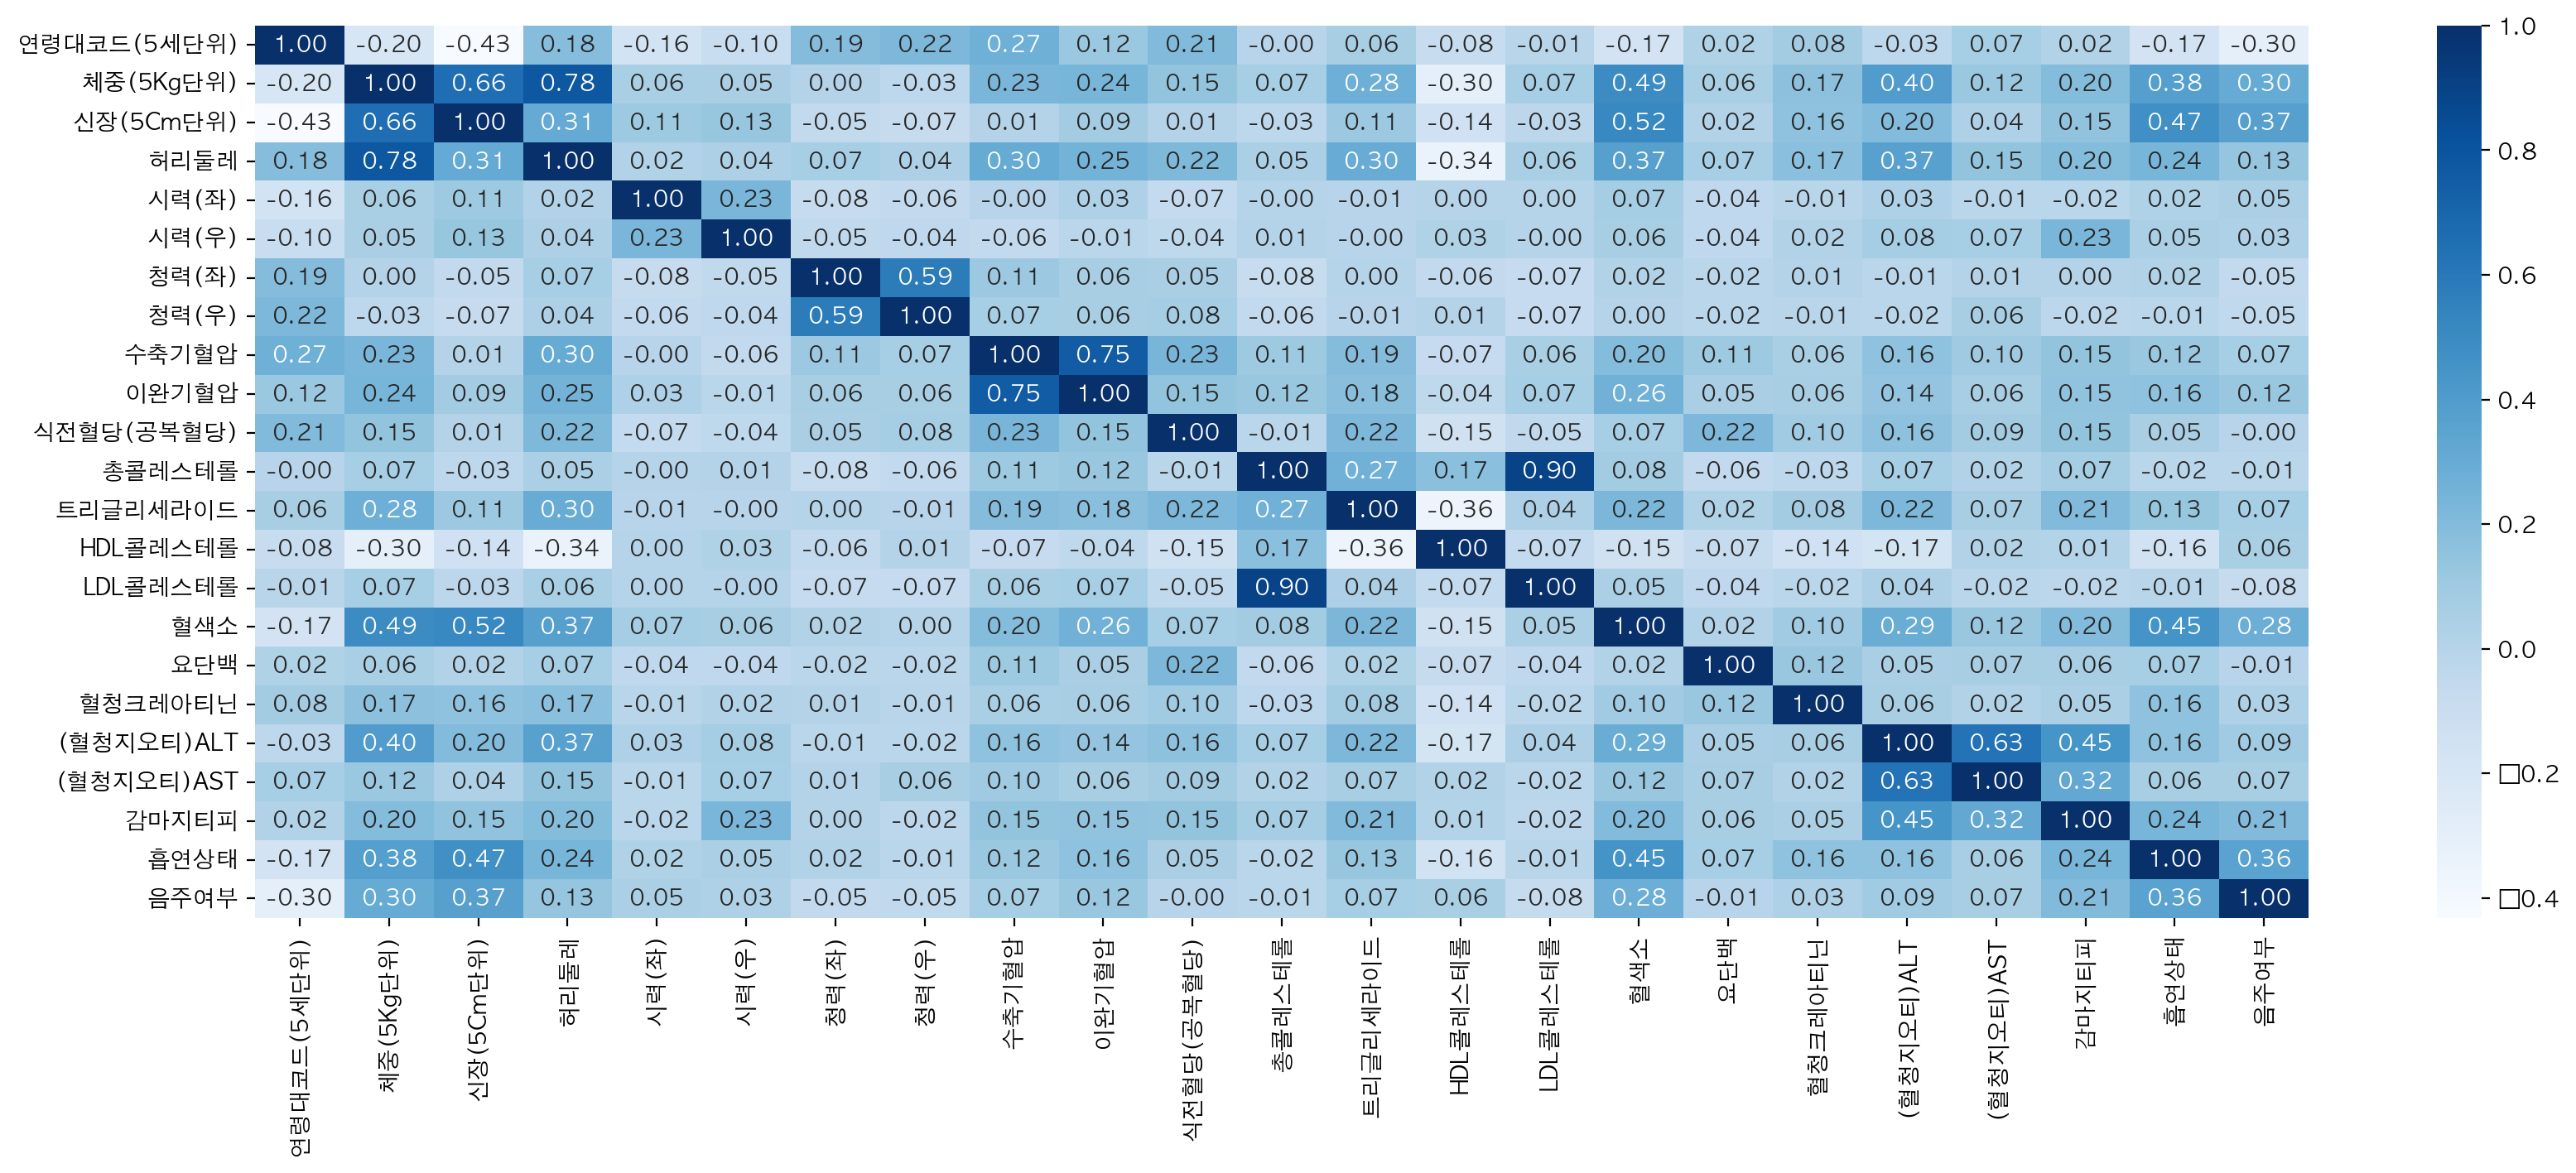

In [12]:
#상관계수를 히트맵으로 표현해봅시다.
plt.figure(figsize=(20,7))
sns.heatmap(df_corr,annot=True,cmap='Blues',fmt='.2f')
plt.show()

In [ ]:
#가설검증 -> 신장과 허리둘레의 크기는 체중과 상관관계가 있다. 